## Image Convolution 

In [66]:
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt
import pixiedust

In [67]:
# X and F are numpy matrices
def convolve_np(X, F):
    X_height = X.shape[0]
    X_width = X.shape[1]

    F_height = F.shape[0]
    F_width = F.shape[1]
    
    H = np.int((F_height - 1) / 2)
    W = np.int((F_width - 1) / 2)
    
    out = np.zeros((X_height, X_width))
    
    for i in np.arange(H, X_height-H):
        for j in np.arange(W, X_width-W):
            sum = 0
            for k in np.arange(-H, H+1):
                for l in np.arange(-W, W+1):
                    a = X[i+k, j+l]
                    w = F[H+k, W+l]
                    sum += (w * a)
            out[i,j] = sum
        
    return out

In [68]:
img = cv2.imread('images/low_contrast_1.jpg', cv2.IMREAD_GRAYSCALE)
imgOrig = img.copy()
print(img.dtype)
height = img.shape[0]
width = img.shape[1]
print('height=',height,'width = ',width)

uint8
height= 350 width =  523


In [71]:
kernel = np.asarray([[-1, -2, -1], [0, 0, 0],[1, 2, 1]])
img = np.asarray(img,dtype=np.float64)
outputImg = convolve_np(img, kernel)

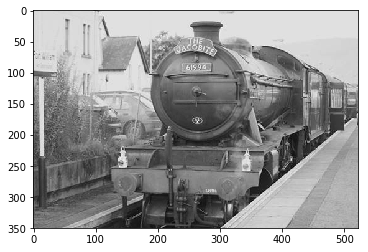

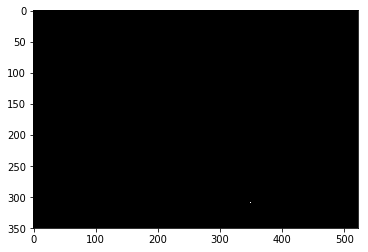

In [72]:
mini = outputImg.min()
maxi = outputImg.max()
outImg = np.uint8((outputImg-mini)/(maxi-mini))*255
plt.figure()
plt.imshow(imgOrig,'gray')
plt.figure()
plt.imshow(outImg,'gray',)

In [64]:
outImg.max()

255